In [1]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Use pretrain model InceptionV3

base_model = InceptionV3(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(150,150,3)
                     )

base_model.trainable=False

img_input = layers.Input(shape=(150, 150, 3))
output_tensor = base_model(img_input)

model = Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')
    ])

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 3, 3, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,242,532 (119.18 MB)

 Trainable params: 9,439,748 (36.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '../../images',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical', 
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    '../../images',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='validation' 
)

Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [31]:
print(train_generator.class_indices)

{'french_bulldog': 0, 'german_shepherd': 1, 'golden_retriever': 2, 'poodle': 3}


In [4]:
from tensorflow.keras import callbacks

early = callbacks.EarlyStopping(patience=8,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [5]:
batch_size=32
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

# fit model
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=25,
                    callbacks=[early])


Epoch 1/25


/Users/fernandasecinaro/Library/Caches/pypoetry/virtualenvs/image-classifier-2tfNJVpE-py3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2415 - loss: 28.1237 - val_accuracy: 0.2500 - val_loss: 76.7424
Epoch 2/25
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.2000 - loss: 76.8396

2024-09-23 00:49:30.413598: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/fernandasecinaro/.pyenv/versions/3.12.5/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.2000 - loss: 76.8396 - val_accuracy: 0.5000 - val_loss: 37.4197
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - accuracy: 0.4006 - loss: 34.5704 - val_accuracy: 0.6875 - val_loss: 19.7082
Epoch 4/25
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.6000 - loss: 20.4567

2024-09-23 00:49:33.052117: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - accuracy: 0.6000 - loss: 20.4567 - val_accuracy: 0.6250 - val_loss: 19.7445
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - accuracy: 0.4989 - loss: 23.9098 - val_accuracy: 0.6875 - val_loss: 9.4115
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.8000 - loss: 6.3061 - val_accuracy: 0.7500 - val_loss: 8.4215
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.6004 - loss: 19.1411 - val_accuracy: 0.8750 - val_loss: 3.3516
Epoch 8/25
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8000 - loss: 2.6810

2024-09-23 00:49:38.582253: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.8000 - loss: 2.6810 - val_accuracy: 0.9375 - val_loss: 3.1175
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 373ms/step - accuracy: 0.8744 - loss: 2.1145 - val_accuracy: 0.8125 - val_loss: 7.6473
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.6500 - loss: 10.1910 - val_accuracy: 0.8750 - val_loss: 4.3456
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 414ms/step - accuracy: 0.8854 - loss: 5.1965 - val_accuracy: 0.6250 - val_loss: 25.9515
Epoch 12/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.7500 - loss: 6.0843 - val_accuracy: 0.6250 - val_loss: 21.1513
Epoch 13/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 366ms/step - accuracy: 0.8642 - loss: 3.7760 - val_accuracy: 0.8125 - val_loss: 11.6003
Epoch 14/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.9500 - loss: 0.5211 - val_accuracy: 0.8750 - val_loss: 8.2902
Epoch 15/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - accuracy: 0.9222 - loss: 3.2363 - val_accuracy: 0.8750 - val_loss: 

2024-09-23 00:49:48.548570: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.7500 - loss: 14.7313 - val_accuracy: 0.8125 - val_loss: 7.8413


In [23]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 

print("Loss: ",accuracy_score[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.9375 - loss: 2.0537
[2.0536980628967285, 0.9375]
Accuracy: 93.7500%
Loss:  2.0536980628967285


In [7]:
import matplotlib.pyplot as plt

def plot(training_history):
    acc = training_history.history['accuracy']
    val_acc = training_history.history['val_accuracy']
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']
    epochs = range(len(acc))


    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

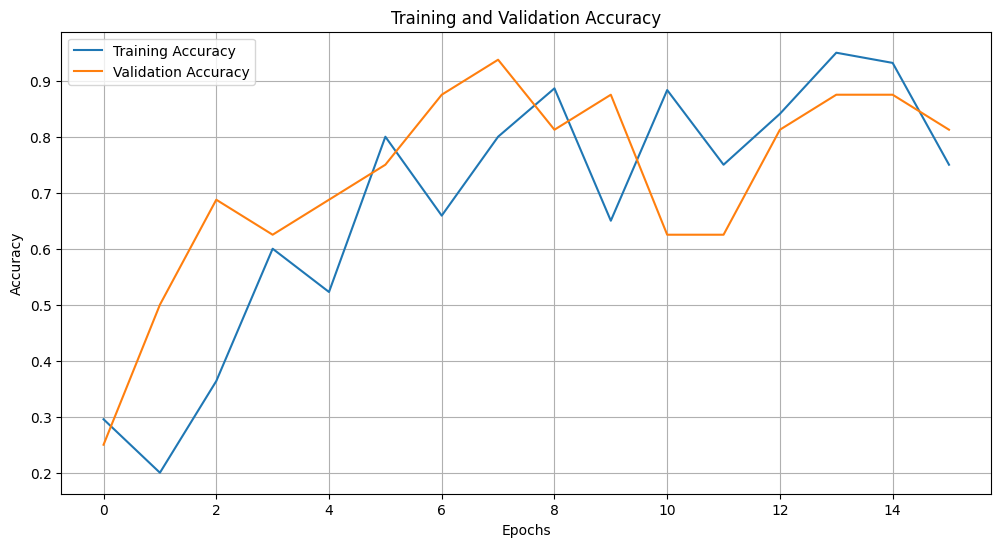

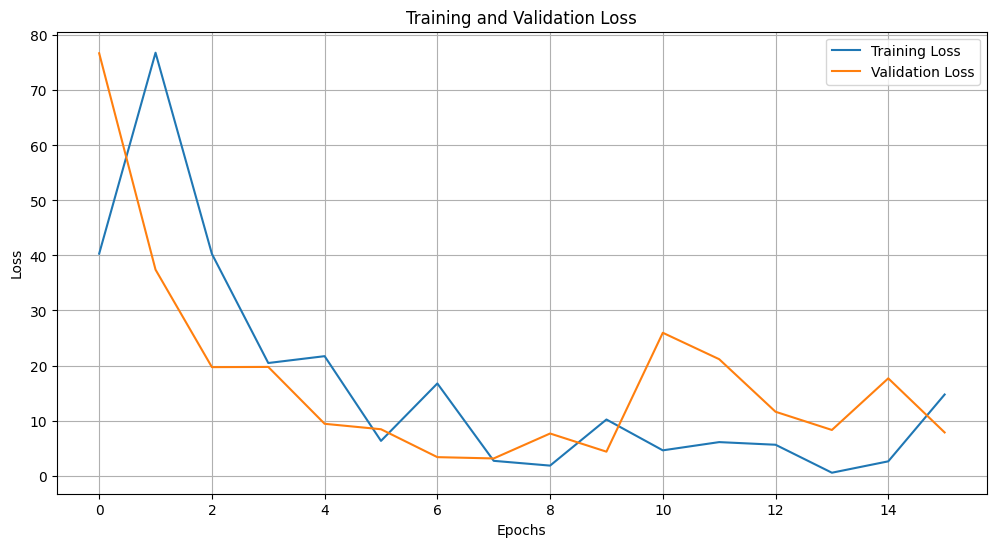

In [8]:
plot(history)

In [30]:
model.save("model.keras")